# Global Power Plant Database project

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.impute import SimpleImputer
from scipy import stats
from sklearn.preprocessing import OneHotEncoder,LabelEncoder ,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")

In [4]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(908, 25)

# Checking for null values

In [6]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

- many columns has nan values,lets check the precentage of missing values

In [7]:
df.isnull().mean()*100

country                       0.000000
country_long                  0.000000
name                          0.000000
gppd_idnr                     0.000000
capacity_mw                   0.000000
latitude                      5.066079
longitude                     5.066079
primary_fuel                  0.000000
other_fuel1                  78.083700
other_fuel2                  99.889868
other_fuel3                 100.000000
commissioning_year           41.850220
owner                        62.334802
source                        0.000000
url                           0.000000
geolocation_source            2.092511
wepp_id                     100.000000
year_of_capacity_data        42.731278
generation_gwh_2013          57.709251
generation_gwh_2014          55.837004
generation_gwh_2015          53.193833
generation_gwh_2016          51.872247
generation_gwh_2017          51.211454
generation_data_source       50.440529
estimated_generation_gwh    100.000000
dtype: float64

In most of the columns the percentage of missing values is too high & that will need to be removed since it provides no insights.
so we are going to remove the columns which has more then 40 % missing values.

In [8]:
columns_with_nan =[]
for i in df.columns:
    if (df[i].isnull().mean()*100 ) > 40 :
        columns_with_nan.append(i)
    

In [9]:
columns_with_nan

['other_fuel1',
 'other_fuel2',
 'other_fuel3',
 'commissioning_year',
 'owner',
 'wepp_id',
 'year_of_capacity_data',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_data_source',
 'estimated_generation_gwh']

These are the columns which has more then 40 % of missing values.

In [10]:
df.drop(columns=columns_with_nan,axis=1,inplace=True)

Now columns with more then 40% missing values has been removed 

In [11]:
df.isnull().sum()

country                0
country_long           0
name                   0
gppd_idnr              0
capacity_mw            0
latitude              46
longitude             46
primary_fuel           0
source                 0
url                    0
geolocation_source    19
dtype: int64

Now wee still have some missing values and have to handel it.

# Information about data

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             908 non-null    object 
 1   country_long        908 non-null    object 
 2   name                908 non-null    object 
 3   gppd_idnr           908 non-null    object 
 4   capacity_mw         908 non-null    float64
 5   latitude            862 non-null    float64
 6   longitude           862 non-null    float64
 7   primary_fuel        908 non-null    object 
 8   source              908 non-null    object 
 9   url                 908 non-null    object 
 10  geolocation_source  889 non-null    object 
dtypes: float64(3), object(8)
memory usage: 78.2+ KB


Capacity_mw,latutude & longitude are of float type rest of all columns are of object type.

# Checking mathematical aspects about data

In [13]:
df.describe()

,capacity_mw,latitude,longitude
count,908.000000,862.000000,862.000000
mean,321.046378,21.196189,77.447848
std,580.221767,6.248627,4.907260
min,0.000000,8.168900,68.644700
25%,16.837500,16.771575,74.258975
50%,60.000000,21.778300,76.719250
75%,388.125000,25.516375,79.441475
max,4760.000000,34.649000,95.408000


### Observations
- Capacity_mw columns has no null values.
- mean is greatter then median hence data is right skewed.
- maximum value is way far from 75th percentile hence outliers present.
- latitude column has some missing values.
- mean and median are almost same hence data is normally distributrd.
- maximum and minumum values are not far from 75th & 25th precentile hence no outliers present.
- longitude column has some missing values.
- mean is greatter then median hence data is right skewed.
- maximum value is way far from 75th percentile hence outliers present.

# Checking Correlation

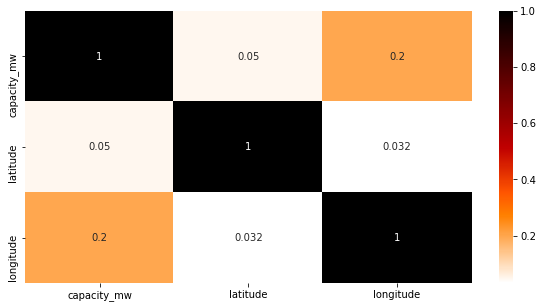

In [14]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap="gist_heat_r")
plt.show()

# saperating numericals & categorical columns

In [15]:
num_var = []
cat_var = []
for i in df.columns:
    if df[i].dtype == "O":
        cat_var.append(i)
    else:
        num_var.append(i)

In [16]:
print("Numericals VAriables \n-------------------------------------")
for i in num_var:
    print(i ,'has ',df[i].isnull().sum(),"nan values")

print("\nCategorical VAriables \n-------------------------------------")    
for i in cat_var:
    print(i ,'has ',df[i].isnull().sum(),"nan values")

Numericals VAriables 
-------------------------------------
capacity_mw has  0 nan values
latitude has  46 nan values
longitude has  46 nan values

Categorical VAriables 
-------------------------------------
country has  0 nan values
country_long has  0 nan values
name has  0 nan values
gppd_idnr has  0 nan values
primary_fuel has  0 nan values
source has  0 nan values
url has  0 nan values
geolocation_source has  19 nan values


In [17]:
df['latitude'].fillna(df["latitude"].mean(), inplace=True)
df["longitude"].fillna(df['longitude'].mean(), inplace=True)    
df["geolocation_source_Indicator"] = np.where(df["geolocation_source"].isnull(),1,0)
df["geolocation_source"].fillna(df["geolocation_source"].mode()[0], inplace=True)       

In [18]:
df.isnull().sum()

country                         0
country_long                    0
name                            0
gppd_idnr                       0
capacity_mw                     0
latitude                        0
longitude                       0
primary_fuel                    0
source                          0
url                             0
geolocation_source              0
geolocation_source_Indicator    0
dtype: int64

now none of the column has nan values,we can proceed further

In [19]:
for i in cat_var:
    print(i)
    print(df[i].nunique())
    print("----------\n")

country
1
----------

country_long
1
----------

name
908
----------

gppd_idnr
908
----------

primary_fuel
8
----------

source
191
----------

url
304
----------

geolocation_source
3
----------



name,url and gppd_idnr has lots of unique values so we are dropping them from data frame
countrycand country_long column has only 1 value so we can drop them also.

In [20]:
df.drop(columns=["url","gppd_idnr","country_long","country","name"],axis=1,inplace=True)

In [21]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,geolocation_source_Indicator
0,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory,0
1,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,WRI,0
2,39.2,21.9038,69.3732,Wind,CDM,WRI,0
3,135.0,23.8712,91.3602,Gas,Central Electricity Authority,WRI,0
4,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,WRI,0


In [22]:
df["primary_fuel"].value_counts()

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

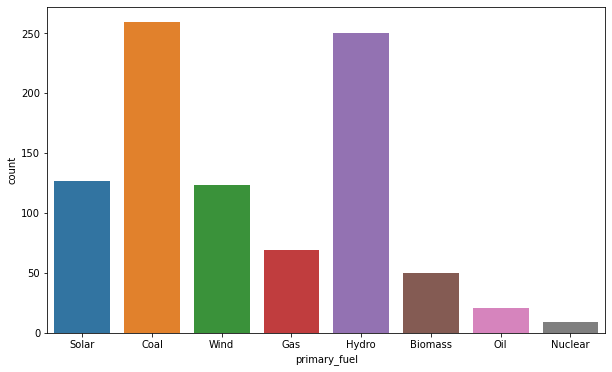

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(df["primary_fuel"])
plt.show()

Coal & hydro is the highest number of value after them solar and wind has the higher values.
As primary_fuel is our output column it looks like classes are imbalance so we have to make it balance.

In [24]:
df["geolocation_source"].value_counts()/908*100

WRI                                     86.453744
Industry About                          13.105727
National Renewable Energy Laboratory     0.440529
Name: geolocation_source, dtype: float64

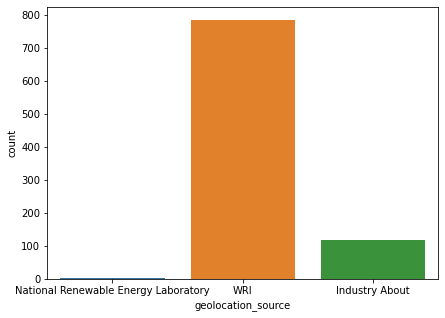

In [25]:
plt.figure(figsize=(7,5))
sns.countplot(df["geolocation_source"])
plt.show()

In the above count plot for "geolocation_source" column we see that the highest data value about 86% is covered by WRI option and the least value .44 % which seems quite negligible has been accumulated by National Renewable Energy Laboratory.

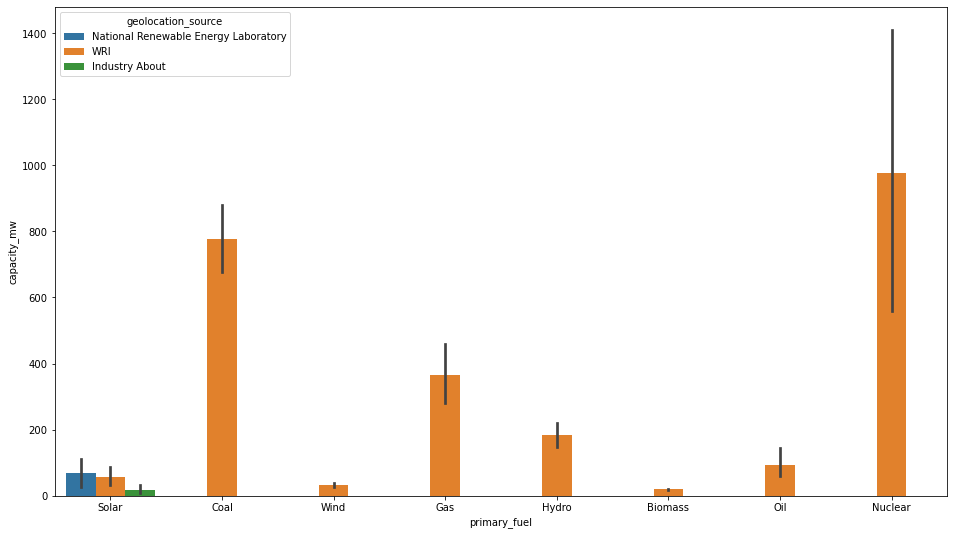

In [26]:
plt.figure(figsize=(16,9))
sns.barplot(x=df["primary_fuel"],y=df["capacity_mw"],hue=df["geolocation_source"])
plt.show()

<AxesSubplot:xlabel='geolocation_source', ylabel='primary_fuel'>

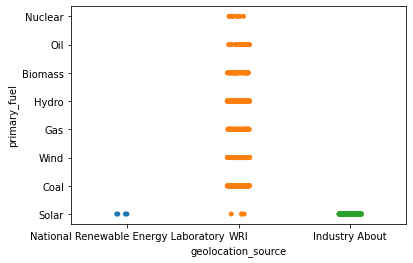

In [27]:
sns.stripplot(df["geolocation_source"],df["primary_fuel"])

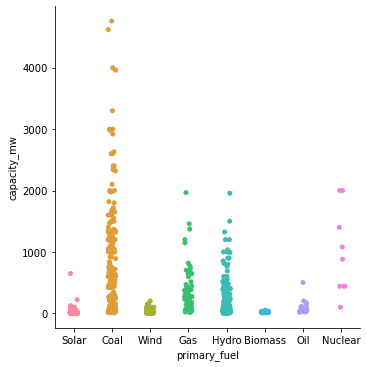

In [28]:
plt.style.use('seaborn-pastel')
sns.catplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.show()

Coal is the highest value to generate electrucity

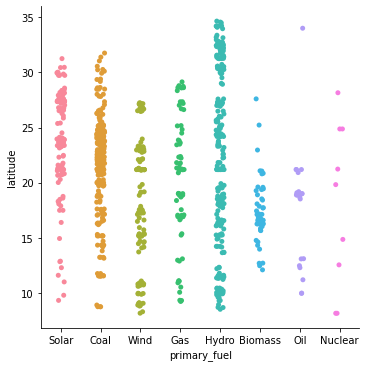

In [29]:
sns.catplot(x = "primary_fuel", y = "latitude", data = df)
plt.show()

# PairPlot

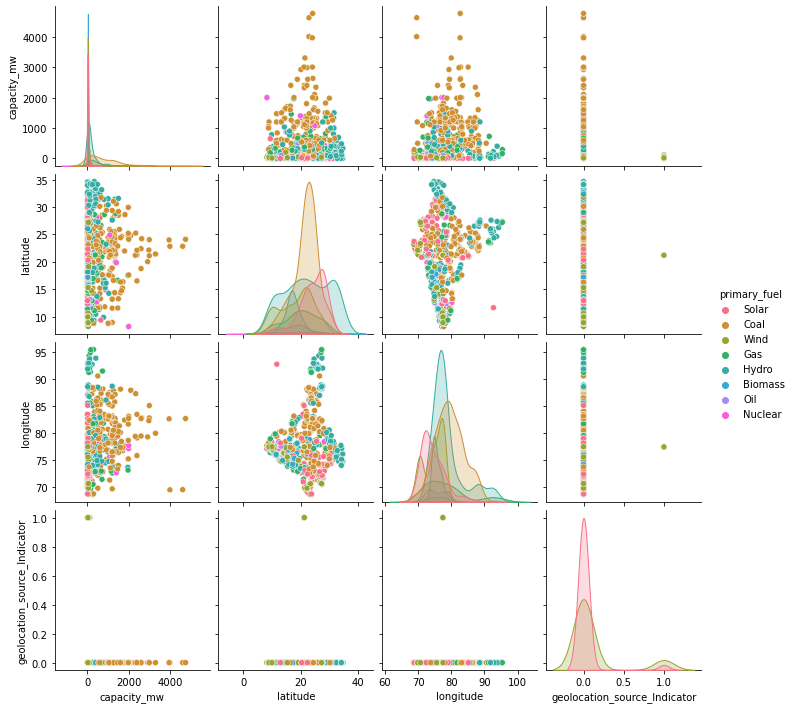

In [30]:
sns.pairplot(df,hue="primary_fuel")

From pair plot we can get a idea about how our data points are plotted on 2d plot hence we can understand which algorithms will perform well on these situation

# Checking for outliers

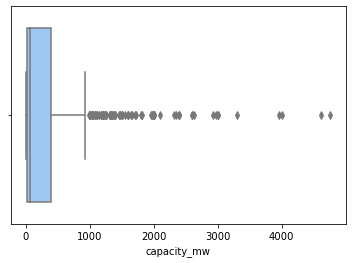

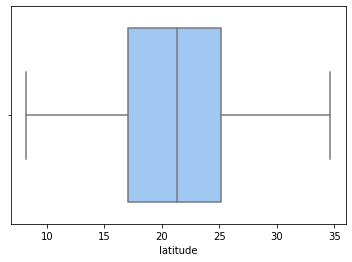

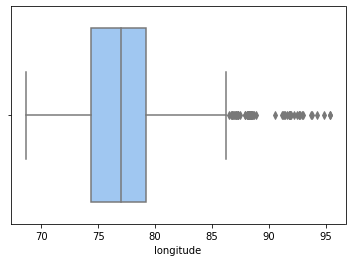

In [31]:
for i in num_var:
    sns.boxplot(df[i])
    plt.show()

# Removing outliers using IQR method

In [32]:
for i in num_var:
    IQR = df[i].quantile(.75) - df[i].quantile(.25)
    upper = df[i].quantile(.75) + 1.5 * IQR
    lower = df[i].quantile(.25) - 1.5 * IQR
    df[i] = np.where(df[i]>upper,upper,np.where(df[i]<lower,lower,df[i]))
    

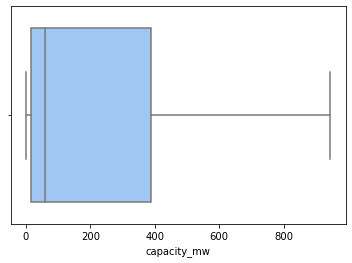

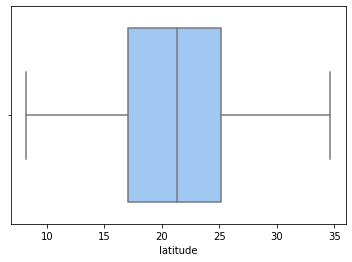

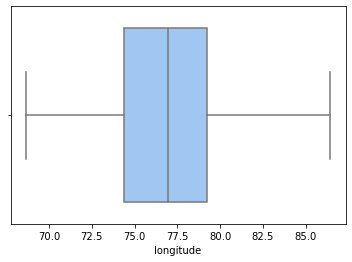

In [33]:
for i in num_var:
    sns.boxplot(df[i])
    plt.show()

outliers has been removed

# checking for skewness

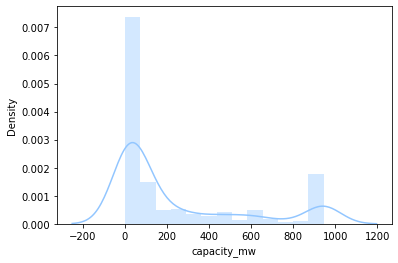

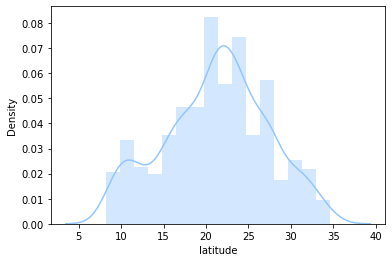

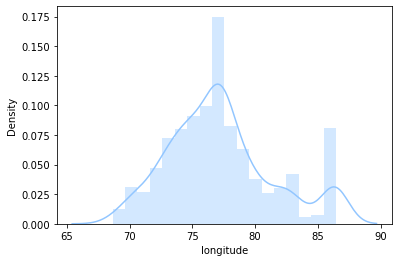

In [34]:
for i in num_var:
    sns.distplot(df[i])
    plt.show()

In [35]:
df[num_var].skew()

capacity_mw    1.306045
latitude      -0.147391
longitude      0.562293
dtype: float64

capacity_mw  & longitude columns has skewness

# Removing skewness

In [36]:
df["capacity_mw"],params = stats.boxcox(df["capacity_mw"]+0.00001)
df["longitude"],params = stats.boxcox(df["longitude"]+0.00001)

In [37]:
df[num_var].skew()

capacity_mw   -0.015782
latitude      -0.147391
longitude      0.000000
dtype: float64

now we can see that skewness has been removed from the data

# Encoding for source column

In [38]:
list1=df["source"].value_counts().sort_values(ascending=False).head(5).index
list1 = list(list1)

In [39]:
list1

['Central Electricity Authority',
 'CDM',
 'Lancosola',
 'National Renewable Energy Laboratory',
 'National Thermal Power Corporation (NTPC)']

these are the categories that occurs frequently in the source column hance we are going to one hot encode them

In [40]:
for i in list1:
    df[i] = np.where(df["source"] == i ,1 , 0)

In [41]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,geolocation_source_Indicator,Central Electricity Authority,CDM,Lancosola,National Renewable Energy Laboratory,National Thermal Power Corporation (NTPC)
0,0.951925,28.1839,0.327991,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory,0,0,0,0,1,0
1,5.575935,24.7663,0.327991,Coal,Ultratech Cement ltd,WRI,0,0,0,0,0,0
2,4.286397,21.9038,0.327990,Wind,CDM,WRI,0,0,1,0,0,0
3,6.050281,23.8712,0.327991,Gas,Central Electricity Authority,WRI,0,1,0,0,0,0
4,9.218679,21.9603,0.327991,Coal,Central Electricity Authority,WRI,0,1,0,0,0,0


now we can drop the source column from the dataframe

# Label encoding the output column

In [42]:
# Label Encoder
le = LabelEncoder()
df["primary_fuel"] = le.fit_transform(df["primary_fuel"])
df.head()

,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,geolocation_source_Indicator,Central Electricity Authority,CDM,Lancosola,National Renewable Energy Laboratory,National Thermal Power Corporation (NTPC)
0,0.951925,28.1839,0.327991,6,National Renewable Energy Laboratory,National Renewable Energy Laboratory,0,0,0,0,1,0
1,5.575935,24.7663,0.327991,1,Ultratech Cement ltd,WRI,0,0,0,0,0,0
2,4.286397,21.9038,0.327990,7,CDM,WRI,0,0,1,0,0,0
3,6.050281,23.8712,0.327991,2,Central Electricity Authority,WRI,0,1,0,0,0,0
4,9.218679,21.9603,0.327991,1,Central Electricity Authority,WRI,0,1,0,0,0,0


# FOR CLASSIFICATION PROBLEM

## saperating input and output labels

In [43]:
X = df.drop(columns=["primary_fuel","source"])

In [44]:
y = df["primary_fuel"]

In [45]:
X

,capacity_mw,latitude,longitude,geolocation_source,geolocation_source_Indicator,Central Electricity Authority,CDM,Lancosola,National Renewable Energy Laboratory,National Thermal Power Corporation (NTPC)
0,0.951925,28.1839,0.327991,National Renewable Energy Laboratory,0,0,0,0,1,0
1,5.575935,24.7663,0.327991,WRI,0,0,0,0,0,0
2,4.286397,21.9038,0.327990,WRI,0,0,1,0,0,0
3,6.050281,23.8712,0.327991,WRI,0,1,0,0,0,0
4,9.218679,21.9603,0.327991,WRI,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
903,9.218679,16.2949,0.327991,WRI,0,1,0,0,0,0
904,1.150097,12.8932,0.327991,Industry About,0,0,0,0,0,0
905,3.714133,15.2758,0.327991,WRI,0,0,1,0,0,0
906,5.281840,24.3500,0.327991,WRI,0,0,0,0,0,0


In [46]:
y

0      6
1      1
2      7
3      2
4      1
      ..
903    1
904    6
905    7
906    1
907    7
Name: primary_fuel, Length: 908, dtype: int32

In [80]:
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer,OneHotEncoder,LabelEncoder
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier,VotingClassifier,BaggingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,RandomizedSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score
from imblearn.over_sampling import SMOTE

In [48]:
step1 = ColumnTransformer(transformers=[("ohe",OneHotEncoder(sparse=False,drop="first"),["geolocation_source"])],remainder="passthrough")
X=step1.fit_transform(X)

In [49]:
X = pd.DataFrame(X)

In [50]:
X

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,0.0,0.951925,28.1839,0.327991,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,5.575935,24.7663,0.327991,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,4.286397,21.9038,0.327990,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,6.050281,23.8712,0.327991,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,9.218679,21.9603,0.327991,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
903,0.0,1.0,9.218679,16.2949,0.327991,0.0,1.0,0.0,0.0,0.0,0.0
904,0.0,0.0,1.150097,12.8932,0.327991,0.0,0.0,0.0,0.0,0.0,0.0
905,0.0,1.0,3.714133,15.2758,0.327991,0.0,0.0,1.0,0.0,0.0,0.0
906,0.0,1.0,5.281840,24.3500,0.327991,0.0,0.0,0.0,0.0,0.0,0.0


since our output classes are imbalanced we are going to make them balance

# Performing SMOTE to make balance classes

In [57]:
smote = SMOTE()
X,y = smote.fit_resample(X, y)

In [59]:
y.value_counts()

7    259
5    259
3    259
1    259
6    259
4    259
2    259
0    259
Name: primary_fuel, dtype: int64

now classes are balanced and we can no train our models

# Creating function to select best model

In [62]:
def max_accuracy_score(pipe,X,y):
    max_accuracy=0
    for i in range(0,100):
        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=i,stratify=y)
        pipe.fit(X_train,y_train)
        y_pred=pipe.predict(X_test)
        y_train_pred =pipe.predict(X_train)
        accuracy_check=accuracy_score(y_test,y_pred)
        if accuracy_check>max_accuracy:
            max_accuracy=accuracy_check
            final_r=i
    print('max Accuracy score corresponding to',final_r,'is',max_accuracy)
    print('cross validation score',cross_val_score(pipe,X,y,scoring='accuracy').mean()*100)
    print('Standard Deviation',cross_val_score(pipe,X,y,scoring='accuracy').std()*100)
    print('Training accuracy',round(accuracy_score(y_train_pred,y_train),2)*100)
    print('Test Accuracy',round(accuracy_score(y_pred,y_test),2)*100)
    print('Confusion Matrix\n')
    print()
    print(confusion_matrix(y_test,y_pred))
    print('Classification Report',classification_report(y_test,y_pred))

# Creating pipeline

### LogisticRegression

In [60]:
step1 = ColumnTransformer(transformers=[
    ("scaling",StandardScaler(),slice(0,X.shape[1]+1))
],remainder="passthrough")


step2 = LogisticRegression()

pipe = Pipeline([
    
    ('step1',step1),
    ('step2',step2),
])

In [61]:
pipe

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaling', StandardScaler(),
                                                  slice(0, 12, None))])),
                ('step2', LogisticRegression())])

In [63]:
max_accuracy_score(pipe,X,y)

max Accuracy score corresponding to 10 is 0.7421686746987952
cross validation score 71.04243059193294
Standard Deviation 1.2963329140009066
Training accuracy 72.0
Test Accuracy 70.0
Confusion Matrix


[[50  0  0  0  0  2  0  0]
 [ 4 28  2  6 11  1  0  0]
 [ 0 10  9  7 17  9  0  0]
 [ 0  4  6 29  5  8  0  0]
 [ 0  3  4  3 42  0  0  0]
 [ 0  2 13  7  1 29  0  0]
 [ 0  0  0  0  0  0 51  0]
 [ 0  0  0  0  0  0  0 52]]
Classification Report               precision    recall  f1-score   support

           0       0.93      0.96      0.94        52
           1       0.60      0.54      0.57        52
           2       0.26      0.17      0.21        52
           3       0.56      0.56      0.56        52
           4       0.55      0.81      0.66        52
           5       0.59      0.56      0.57        52
           6       1.00      1.00      1.00        51
           7       1.00      1.00      1.00        52

    accuracy                           0.70       415
   macro avg      

# SVC

In [64]:
step1 = ColumnTransformer(transformers=[
    ("scaling",StandardScaler(),slice(0,X.shape[1]+1))
],remainder="passthrough")


step2 = SVC()

pipe = Pipeline([
    
    ('step1',step1),
    ('step2',step2),
])

In [65]:
max_accuracy_score(pipe,X,y)

max Accuracy score corresponding to 20 is 0.7783132530120482
cross validation score 74.37203888015831
Standard Deviation 1.1377126062202803
Training accuracy 76.0
Test Accuracy 72.0
Confusion Matrix


[[51  1  0  0  0  0  0  0]
 [ 6 26  2  6 10  2  0  0]
 [ 0  6  4  9 20 13  0  0]
 [ 0  1  4 33  7  7  0  0]
 [ 0  3  2  1 46  0  0  0]
 [ 0  2  3 10  1 36  0  0]
 [ 0  0  0  0  0  0 51  0]
 [ 0  0  0  0  0  0  0 52]]
Classification Report               precision    recall  f1-score   support

           0       0.89      0.98      0.94        52
           1       0.67      0.50      0.57        52
           2       0.27      0.08      0.12        52
           3       0.56      0.63      0.59        52
           4       0.55      0.88      0.68        52
           5       0.62      0.69      0.65        52
           6       1.00      1.00      1.00        51
           7       1.00      1.00      1.00        52

    accuracy                           0.72       415
   macro avg      

# KNN

In [66]:
step1 = ColumnTransformer(transformers=[
    ("scaling",StandardScaler(),slice(0,X.shape[1]+1))
],remainder="passthrough")


step2 = KNeighborsClassifier()

pipe = Pipeline([
    
    ('step1',step1),
    ('step2',step2),
])

In [67]:
max_accuracy_score(pipe,X,y)

max Accuracy score corresponding to 7 is 0.8939759036144578
cross validation score 86.14830335836098
Standard Deviation 1.4645869191244516
Training accuracy 91.0
Test Accuracy 85.0
Confusion Matrix


[[51  1  0  0  0  0  0  0]
 [ 4 31  4  4  7  2  0  0]
 [ 0  3 40  3  3  3  0  0]
 [ 0  3  9 30  5  5  0  0]
 [ 0  1  1  0 50  0  0  0]
 [ 0  0  3  2  0 47  0  0]
 [ 0  0  0  0  0  0 51  0]
 [ 0  0  0  0  0  0  0 52]]
Classification Report               precision    recall  f1-score   support

           0       0.93      0.98      0.95        52
           1       0.79      0.60      0.68        52
           2       0.70      0.77      0.73        52
           3       0.77      0.58      0.66        52
           4       0.77      0.96      0.85        52
           5       0.82      0.90      0.86        52
           6       1.00      1.00      1.00        51
           7       1.00      1.00      1.00        52

    accuracy                           0.85       415
   macro avg       

# DecissionTree

In [68]:
step1 = ColumnTransformer(transformers=[
    ("scaling",StandardScaler(),slice(0,X.shape[1]+1))
],remainder="passthrough")


step2 = DecisionTreeClassifier()

pipe = Pipeline([
    
    ('step1',step1),
    ('step2',step2),
])

In [69]:
max_accuracy_score(pipe,X,y)

max Accuracy score corresponding to 41 is 0.8939759036144578
cross validation score 85.52179733426459
Standard Deviation 1.550877209058918
Training accuracy 100.0
Test Accuracy 80.0
Confusion Matrix


[[49  3  0  0  0  0  0  0]
 [ 6 31  5  8  1  1  0  0]
 [ 0  5 35  4  3  5  0  0]
 [ 0  3 11 29  3  6  0  0]
 [ 0  8  2  1 41  0  0  0]
 [ 0  1  2  4  0 45  0  0]
 [ 0  1  0  0  0  0 50  0]
 [ 0  0  0  0  0  0  0 52]]
Classification Report               precision    recall  f1-score   support

           0       0.89      0.94      0.92        52
           1       0.60      0.60      0.60        52
           2       0.64      0.67      0.65        52
           3       0.63      0.56      0.59        52
           4       0.85      0.79      0.82        52
           5       0.79      0.87      0.83        52
           6       1.00      0.98      0.99        51
           7       1.00      1.00      1.00        52

    accuracy                           0.80       415
   macro avg      

# Random Forest

In [74]:
step1 = ColumnTransformer(transformers=[
    ("scaling",StandardScaler(),slice(0,X.shape[1]+1))
],remainder="passthrough")


step2 = RandomForestClassifier()

pipe = Pipeline([
    
    ('step1',step1),
    ('step2',step2),
])

In [75]:
max_accuracy_score(pipe,X,y)

max Accuracy score corresponding to 41 is 0.927710843373494
cross validation score 88.94825679529713
Standard Deviation 0.9426848386096927
Training accuracy 100.0
Test Accuracy 88.0
Confusion Matrix


[[51  1  0  0  0  0  0  0]
 [ 5 39  2  4  1  1  0  0]
 [ 0  3 41  2  4  2  0  0]
 [ 0  2  7 36  4  3  0  0]
 [ 0  3  1  0 48  0  0  0]
 [ 0  1  1  3  0 47  0  0]
 [ 0  0  0  0  0  0 51  0]
 [ 0  0  0  0  0  0  0 52]]
Classification Report               precision    recall  f1-score   support

           0       0.91      0.98      0.94        52
           1       0.80      0.75      0.77        52
           2       0.79      0.79      0.79        52
           3       0.80      0.69      0.74        52
           4       0.84      0.92      0.88        52
           5       0.89      0.90      0.90        52
           6       1.00      1.00      1.00        51
           7       1.00      1.00      1.00        52

    accuracy                           0.88       415
   macro avg      

# GradientBoostingClassifier

In [76]:
step1 = ColumnTransformer(transformers=[
    ("scaling",StandardScaler(),slice(0,X.shape[1]+1))
],remainder="passthrough")


step2 = GradientBoostingClassifier(random_state=0)

pipe = Pipeline([
    
    ('step1',step1),
    ('step2',step2),
])

In [77]:
max_accuracy_score(pipe,X,y)

max Accuracy score corresponding to 41 is 0.9036144578313253
cross validation score 87.50037832489377
Standard Deviation 1.1326463247571315
Training accuracy 98.0
Test Accuracy 87.0
Confusion Matrix


[[50  2  0  0  0  0  0  0]
 [ 7 34  2  4  4  1  0  0]
 [ 0  5 39  1  4  3  0  0]
 [ 0  1  7 38  5  1  0  0]
 [ 0  2  0  0 50  0  0  0]
 [ 0  0  2  3  2 45  0  0]
 [ 0  0  0  0  0  0 51  0]
 [ 0  0  0  0  0  0  0 52]]
Classification Report               precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.77      0.65      0.71        52
           2       0.78      0.75      0.76        52
           3       0.83      0.73      0.78        52
           4       0.77      0.96      0.85        52
           5       0.90      0.87      0.88        52
           6       1.00      1.00      1.00        51
           7       1.00      1.00      1.00        52

    accuracy                           0.87       415
   macro avg      

# AdaBoostClassifier

In [78]:
step1 = ColumnTransformer(transformers=[
    ("scaling",StandardScaler(),slice(0,X.shape[1]+1))
],remainder="passthrough")


step2 = AdaBoostClassifier(random_state=0)

pipe = Pipeline([
    
    ('step1',step1),
    ('step2',step2),
])

In [79]:
max_accuracy_score(pipe,X,y)

max Accuracy score corresponding to 2 is 0.37349397590361444
cross validation score 37.258716023514346
Standard Deviation 0.11906995760236022
Training accuracy 38.0
Test Accuracy 37.0
Confusion Matrix


[[52  0  0  0  0  0  0  0]
 [52  0  0  0  0  0  0  0]
 [52  0  0  0  0  0  0  0]
 [52  0  0  0  0  0  0  0]
 [52  0  0  0  0  0  0  0]
 [52  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 51  0]
 [ 0  0  0  0  0  0  0 52]]
Classification Report               precision    recall  f1-score   support

           0       0.17      1.00      0.29        52
           1       0.00      0.00      0.00        52
           2       0.00      0.00      0.00        52
           3       0.00      0.00      0.00        52
           4       0.00      0.00      0.00        52
           5       0.00      0.00      0.00        52
           6       1.00      1.00      1.00        51
           7       1.00      1.00      1.00        52

    accuracy                           0.37       415
   macro avg    

# ExtraTreeClassifier

In [81]:
step1 = ColumnTransformer(transformers=[
    ("scaling",StandardScaler(),slice(0,X.shape[1]+1))
],remainder="passthrough")


step2 = ExtraTreeClassifier()

pipe = Pipeline([
    
    ('step1',step1),
    ('step2',step2),
])

In [83]:
max_accuracy_score(pipe,X,y)

max Accuracy score corresponding to 41 is 0.8939759036144578
cross validation score 83.78418019905712
Standard Deviation 2.101696725809449
Training accuracy 100.0
Test Accuracy 82.0
Confusion Matrix


[[50  2  0  0  0  0  0  0]
 [ 2 34  4  6  4  1  1  0]
 [ 0  6 34  5  5  2  0  0]
 [ 0  4  7 37  4  0  0  0]
 [ 0  6  3  1 41  1  0  0]
 [ 0  2  3  1  4 42  0  0]
 [ 0  1  0  0  0  0 50  0]
 [ 0  0  0  0  0  0  0 52]]
Classification Report               precision    recall  f1-score   support

           0       0.96      0.96      0.96        52
           1       0.62      0.65      0.64        52
           2       0.67      0.65      0.66        52
           3       0.74      0.71      0.73        52
           4       0.71      0.79      0.75        52
           5       0.91      0.81      0.86        52
           6       0.98      0.98      0.98        51
           7       1.00      1.00      1.00        52

    accuracy                           0.82       415
   macro avg      

# VotingClassifier

In [85]:
step1 = ColumnTransformer(transformers=[
    ("scaling",StandardScaler(),slice(0,X.shape[1]+1))
],remainder="passthrough")
 
gb = GradientBoostingClassifier(random_state=0)    
rf = RandomForestClassifier()

est = [("gb",gb),('rf',rf)]

step2 = VotingClassifier(estimators=est)

pipe = Pipeline([
    
    ('step1',step1),
    ('step2',step2),
])

In [86]:
max_accuracy_score(pipe,X,y)

max Accuracy score corresponding to 42 is 0.9204819277108434
cross validation score 88.46516500785752
Standard Deviation 0.7920727368358808
Training accuracy 99.0
Test Accuracy 87.0
Confusion Matrix


[[51  1  0  0  0  0  0  0]
 [ 7 36  3  4  1  1  0  0]
 [ 0  5 42  1  3  1  0  0]
 [ 0  4  9 36  3  0  0  0]
 [ 0  4  1  0 47  0  0  0]
 [ 0  1  3  3  1 44  0  0]
 [ 0  0  0  0  0  0 51  0]
 [ 0  0  0  0  0  0  0 52]]
Classification Report               precision    recall  f1-score   support

           0       0.88      0.98      0.93        52
           1       0.71      0.69      0.70        52
           2       0.72      0.81      0.76        52
           3       0.82      0.69      0.75        52
           4       0.85      0.90      0.88        52
           5       0.96      0.85      0.90        52
           6       1.00      1.00      1.00        51
           7       1.00      1.00      1.00        52

    accuracy                           0.87       415
   macro avg      

# BaggingClassifier

In [87]:
step1 = ColumnTransformer(transformers=[
    ("scaling",StandardScaler(),slice(0,X.shape[1]+1))
],remainder="passthrough")
 

step2 = BaggingClassifier()

pipe = Pipeline([
    
    ('step1',step1),
    ('step2',step2),
])

In [88]:
max_accuracy_score(pipe,X,y)

max Accuracy score corresponding to 41 is 0.9132530120481928
cross validation score 87.1629125196438
Standard Deviation 1.24317416077748
Training accuracy 99.0
Test Accuracy 86.0
Confusion Matrix


[[50  2  0  0  0  0  0  0]
 [ 5 38  3  4  1  1  0  0]
 [ 0  2 42  1  4  3  0  0]
 [ 0  5 11 31  2  3  0  0]
 [ 0  3  2  0 47  0  0  0]
 [ 0  1  1  4  0 46  0  0]
 [ 0  0  0  0  0  0 51  0]
 [ 0  0  0  0  0  0  0 52]]
Classification Report               precision    recall  f1-score   support

           0       0.91      0.96      0.93        52
           1       0.75      0.73      0.74        52
           2       0.71      0.81      0.76        52
           3       0.78      0.60      0.67        52
           4       0.87      0.90      0.89        52
           5       0.87      0.88      0.88        52
           6       1.00      1.00      1.00        51
           7       1.00      1.00      1.00        52

    accuracy                           0.86       415
   macro avg       0.

Since Gradient Boosting Classifier performs best among all the other models hence selecting GradientBoostingClassifier as the best model

In [89]:
step1 = ColumnTransformer(transformers=[
    ("scaling",StandardScaler(),slice(0,X.shape[1]+1))
],remainder="passthrough")


step2 = GradientBoostingClassifier(random_state=0)

pipe = Pipeline([
    
    ('step1',step1),
    ('step2',step2),
])
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=41,stratify=y)
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
y_train_pred = pipe.predict(X_train)

print("Training_accuracy : ",accuracy_score(y_train,y_train_pred))
print("Testing_accuracy : ",accuracy_score(y_test,y_pred))

Training_accuracy :  0.9740494870247435
Testing_accuracy :  0.9036144578313253


# Hyper Parameter Tuning

In [109]:
params = {
    
    "step2__learning_rate":np.arange(.1,.9,.1),
    "step2__n_estimators":[100,200,300,400,500,600],
    "step2__max_depth":np.arange(3,10,1),
    "step2__max_features":np.arange(.5,.75,.05)
    
}

In [110]:
randomscv=RandomizedSearchCV(pipe,params,cv=10,n_jobs=-1,scoring="accuracy")

In [111]:
randomscv.fit(X_train,y_train)

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('step1',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('scaling',
                                                                               StandardScaler(),
                                                                               slice(0, 12, None))])),
                                             ('step2',
                                              GradientBoostingClassifier(random_state=0))]),
                   n_jobs=-1,
                   param_distributions={'step2__learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]),
                                        'step2__max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                                        'step2__max_features': array([0.5 , 0.55, 0.6 , 0.65, 0.7 ]),
                                        'step2__n_estimat

In [112]:
randomscv.best_params_

{'step2__n_estimators': 200,
 'step2__max_features': 0.5,
 'step2__max_depth': 6,
 'step2__learning_rate': 0.7000000000000001}

In [116]:
step1 = ColumnTransformer(transformers=[
    ("scaling",StandardScaler(),slice(0,X.shape[1]+1))
],remainder="passthrough")


step2 = GradientBoostingClassifier(n_estimators=200,max_features=0.5,max_depth=6,learning_rate=0.70,random_state=0)

pipe = Pipeline([
    
    ('step1',step1),
    ('step2',step2),
])
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=41,stratify=y)
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
y_train_pred = pipe.predict(X_train)

print('Accuracy Score ',round(accuracy_score(y_pred,y_test),2)*100)
print('cross validation score',cross_val_score(pipe,X,y,scoring='accuracy').mean()*100)
print('Standard Deviation',cross_val_score(pipe,X,y,scoring='accuracy').std()*100)
print('Confusion Matrix\n')
print()
print(confusion_matrix(y_test,y_pred))
print('Classification Report',classification_report(y_test,y_pred))

Accuracy Score  93.0
cross validation score 88.804027705023
Standard Deviation 1.429115669001169
Confusion Matrix


[[52  0  0  0  0  0  0  0]
 [ 1 44  1  3  2  1  0  0]
 [ 0  2 44  3  2  1  0  0]
 [ 0  4  3 41  2  2  0  0]
 [ 0  1  1  0 50  0  0  0]
 [ 0  1  0  1  0 50  0  0]
 [ 0  0  0  0  0  0 51  0]
 [ 0  0  0  0  0  0  0 52]]
Classification Report               precision    recall  f1-score   support

           0       0.98      1.00      0.99        52
           1       0.85      0.85      0.85        52
           2       0.90      0.85      0.87        52
           3       0.85      0.79      0.82        52
           4       0.89      0.96      0.93        52
           5       0.93      0.96      0.94        52
           6       1.00      1.00      1.00        51
           7       1.00      1.00      1.00        52

    accuracy                           0.93       415
   macro avg       0.92      0.93      0.92       415
weighted avg       0.92      0.93      0.92      

After  hyper parameter tuning accuracy is increased by 3% and Precission recall and f1-score is also increased

# Confussion metrics

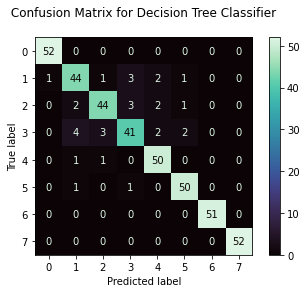

In [124]:
metrics.plot_confusion_matrix(pipe, X_test, y_test, cmap='mako')
plt.title(' Confusion Matrix for Decision Tree Classifier \n')
plt.show()

# Saving the model

In [126]:
import pickle
pickle.dump(pipe,open("Global_pp_clf.pkl","wb"))

# Predictions

In [127]:
original_values  = np.array(y_test)
predicted_values = np.array(pipe.predict(X_test))
values = pd.DataFrame({'Original_values':original_values , 'predicted_values':predicted_values})

In [128]:
values

,Original_values,predicted_values
0,6,6
1,5,5
2,2,2
3,4,4
4,3,3
...,...,...
410,1,1
411,4,4
412,0,0
413,2,2


# FOR REGRESSION PROBLEM

In [131]:
df

,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,geolocation_source_Indicator,Central Electricity Authority,CDM,Lancosola,National Renewable Energy Laboratory,National Thermal Power Corporation (NTPC)
0,0.951925,28.1839,0.327991,6,National Renewable Energy Laboratory,National Renewable Energy Laboratory,0,0,0,0,1,0
1,5.575935,24.7663,0.327991,1,Ultratech Cement ltd,WRI,0,0,0,0,0,0
2,4.286397,21.9038,0.327990,7,CDM,WRI,0,0,1,0,0,0
3,6.050281,23.8712,0.327991,2,Central Electricity Authority,WRI,0,1,0,0,0,0
4,9.218679,21.9603,0.327991,1,Central Electricity Authority,WRI,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
903,9.218679,16.2949,0.327991,1,Central Electricity Authority,WRI,0,1,0,0,0,0
904,1.150097,12.8932,0.327991,6,Karnataka Power Corporation Limited,Industry About,0,0,0,0,0,0
905,3.714133,15.2758,0.327991,7,CDM,WRI,0,0,1,0,0,0
906,5.281840,24.3500,0.327991,1,Hindustan Zinc ltd,WRI,0,0,0,0,0,0


# saperating input and output labels

In [132]:
X = df.drop(columns=["capacity_mw","source"])
y = df["capacity_mw"]

In [133]:
X

,latitude,longitude,primary_fuel,geolocation_source,geolocation_source_Indicator,Central Electricity Authority,CDM,Lancosola,National Renewable Energy Laboratory,National Thermal Power Corporation (NTPC)
0,28.1839,0.327991,6,National Renewable Energy Laboratory,0,0,0,0,1,0
1,24.7663,0.327991,1,WRI,0,0,0,0,0,0
2,21.9038,0.327990,7,WRI,0,0,1,0,0,0
3,23.8712,0.327991,2,WRI,0,1,0,0,0,0
4,21.9603,0.327991,1,WRI,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
903,16.2949,0.327991,1,WRI,0,1,0,0,0,0
904,12.8932,0.327991,6,Industry About,0,0,0,0,0,0
905,15.2758,0.327991,7,WRI,0,0,1,0,0,0
906,24.3500,0.327991,1,WRI,0,0,0,0,0,0


In [134]:
y

0      0.951925
1      5.575935
2      4.286397
3      6.050281
4      9.218679
         ...   
903    9.218679
904    1.150097
905    3.714133
906    5.281840
907    3.155161
Name: capacity_mw, Length: 908, dtype: float64

# One Hot Encoding for geolocation_source column

In [135]:
step1 = ColumnTransformer(transformers=[("ohe",OneHotEncoder(sparse=False,drop="first"),["geolocation_source"])],remainder="passthrough")
X=step1.fit_transform(X)

In [137]:
X = pd.DataFrame(X)

In [138]:
X

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,0.0,28.1839,0.327991,6.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,24.7663,0.327991,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,21.9038,0.327990,7.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,23.8712,0.327991,2.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,21.9603,0.327991,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
903,0.0,1.0,16.2949,0.327991,1.0,0.0,1.0,0.0,0.0,0.0,0.0
904,0.0,0.0,12.8932,0.327991,6.0,0.0,0.0,0.0,0.0,0.0,0.0
905,0.0,1.0,15.2758,0.327991,7.0,0.0,0.0,1.0,0.0,0.0,0.0
906,0.0,1.0,24.3500,0.327991,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [139]:
y

0      0.951925
1      5.575935
2      4.286397
3      6.050281
4      9.218679
         ...   
903    9.218679
904    1.150097
905    3.714133
906    5.281840
907    3.155161
Name: capacity_mw, Length: 908, dtype: float64

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor,StackingRegressor
from sklearn.ensemble import BaggingRegressor

# Creating a function to find best random state for models

In [141]:
def Best_model(pipe,X,y):
    Maximum_R2_score=0
    for random_state in range(42,100):
        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=random_state)
        pipe.fit(X_train,y_train)
        y_pred=pipe.predict(X_test)
        R2_score=r2_score(y_test,y_pred)
        if R2_score>Maximum_R2_score:
            Maximum_R2_score=R2_score
            final_random_state=random_state
    print(f'At random state :-- {final_random_state}')
    print('Maximum r2 score is',  round(Maximum_R2_score ,4))
    print('cross validation score',round(cross_val_score(pipe,X,y,scoring='r2').mean(),2))
    print('Standard Deviation',round(cross_val_score(pipe,X,y,scoring='r2').std(),2))
    print('Training accuracy',round(pipe.score(X_train,y_train),2))
    print('Test Accuracy',round(pipe.score(X_test,y_test),2))
    print('MAE',round(mean_absolute_error(y_test,y_pred),2))
    print('MSE',round(mean_squared_error(y_test,y_pred),2))
    print('RMSE',round(np.sqrt(mean_squared_error(y_test,y_pred)),2))

# Creating Pipeline

## LinearRegression

In [142]:
step1 = ColumnTransformer(transformers=[
    ('Scaler',StandardScaler(),slice(0,X.shape[1]+1))
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

Best_model(pipe,X,y)

At random state :-- 83
Maximum r2 score is 0.6245
cross validation score 0.51
Standard Deviation 0.02
Training accuracy 0.54
Test Accuracy 0.45
MAE 1.5
MSE 3.46
RMSE 1.86


# KNeighborsRegressor

In [143]:
step1 = ColumnTransformer(transformers=[
    ('Scaler',StandardScaler(),slice(0,X.shape[1]+1))
],remainder='passthrough')

step2 = KNeighborsRegressor()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

Best_model(pipe,X,y)

At random state :-- 83
Maximum r2 score is 0.7116
cross validation score 0.59
Standard Deviation 0.03
Training accuracy 0.74
Test Accuracy 0.56
MAE 1.28
MSE 2.81
RMSE 1.68


# SVR

In [144]:
step1 = ColumnTransformer(transformers=[
    ('Scaler',StandardScaler(),slice(0,X.shape[1]+1))
],remainder='passthrough')

step2 = SVR()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

Best_model(pipe,X,y)

At random state :-- 83
Maximum r2 score is 0.6687
cross validation score 0.57
Standard Deviation 0.04
Training accuracy 0.61
Test Accuracy 0.48
MAE 1.39
MSE 3.27
RMSE 1.81


# RandomForestRegressor

In [145]:
step1 = ColumnTransformer(transformers=[
    ('Scaler',StandardScaler(),slice(0,X.shape[1]+1))
],remainder='passthrough')

step2 = RandomForestRegressor()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

Best_model(pipe,X,y)

At random state :-- 61
Maximum r2 score is 0.6987
cross validation score 0.6
Standard Deviation 0.03
Training accuracy 0.93
Test Accuracy 0.55
MAE 1.26
MSE 2.87
RMSE 1.7


# DecisionTreeRegressor

In [146]:
step1 = ColumnTransformer(transformers=[
    ('Scaler',StandardScaler(),slice(0,X.shape[1]+1))
],remainder='passthrough')

step2 = DecisionTreeRegressor()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

Best_model(pipe,X,y)

At random state :-- 66
Maximum r2 score is 0.5755
cross validation score 0.42
Standard Deviation 0.07
Training accuracy 0.98
Test Accuracy 0.38
MAE 1.46
MSE 3.93
RMSE 1.98


# Ridge

In [147]:
step1 = ColumnTransformer(transformers=[
    ('Scaler',StandardScaler(),slice(0,X.shape[1]+1))
],remainder='passthrough')

step2 = Ridge()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

Best_model(pipe,X,y)

At random state :-- 83
Maximum r2 score is 0.6238
cross validation score 0.51
Standard Deviation 0.02
Training accuracy 0.54
Test Accuracy 0.45
MAE 1.5
MSE 3.47
RMSE 1.86


# Lasso

In [148]:
step1 = ColumnTransformer(transformers=[
    ('Scaler',StandardScaler(),slice(0,X.shape[1]+1))
],remainder='passthrough')

step2 = Lasso()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

Best_model(pipe,X,y)

At random state :-- 59
Maximum r2 score is 0.3029
cross validation score 0.26
Standard Deviation 0.03
Training accuracy 0.29
Test Accuracy 0.26
MAE 1.79
MSE 4.66
RMSE 2.16


# ElasticNet

In [149]:
step1 = ColumnTransformer(transformers=[
    ('Scaler',StandardScaler(),slice(0,X.shape[1]+1))
],remainder='passthrough')

step2 = ElasticNet()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

Best_model(pipe,X,y)

At random state :-- 51
Maximum r2 score is 0.3992
cross validation score 0.36
Standard Deviation 0.02
Training accuracy 0.38
Test Accuracy 0.33
MAE 1.71
MSE 4.21
RMSE 2.05


# AdaBoostRegressor

In [150]:
step1 = ColumnTransformer(transformers=[
    ('Scaler',StandardScaler(),slice(0,X.shape[1]+1))
],remainder='passthrough')

step2 = AdaBoostRegressor()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

Best_model(pipe,X,y)

At random state :-- 83
Maximum r2 score is 0.6525
cross validation score 0.57
Standard Deviation 0.02
Training accuracy 0.6
Test Accuracy 0.49
MAE 1.49
MSE 3.25
RMSE 1.8


# GradientBoostingRegressor

In [151]:
step1 = ColumnTransformer(transformers=[
    ('Scaler',StandardScaler(),slice(0,X.shape[1]+1))
],remainder='passthrough')

step2 = GradientBoostingRegressor()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

Best_model(pipe,X,y)

At random state :-- 51
Maximum r2 score is 0.704
cross validation score 0.62
Standard Deviation 0.04
Training accuracy 0.78
Test Accuracy 0.56
MAE 1.29
MSE 2.76
RMSE 1.66


# ExtraTreesRegressor

In [152]:
step1 = ColumnTransformer(transformers=[
    ('Scaler',StandardScaler(),slice(0,X.shape[1]+1))
],remainder='passthrough')

step2 = ExtraTreesRegressor()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

Best_model(pipe,X,y)

At random state :-- 76
Maximum r2 score is 0.6706
cross validation score 0.55
Standard Deviation 0.04
Training accuracy 0.98
Test Accuracy 0.51
MAE 1.3
MSE 3.08
RMSE 1.76


# BaggingRegressor

In [153]:
step1 = ColumnTransformer(transformers=[
    ('Scaler',StandardScaler(),slice(0,X.shape[1]+1))
],remainder='passthrough')

step2 = BaggingRegressor()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

Best_model(pipe,X,y)

At random state :-- 83
Maximum r2 score is 0.6954
cross validation score 0.57
Standard Deviation 0.03
Training accuracy 0.92
Test Accuracy 0.51
MAE 1.32
MSE 3.09
RMSE 1.76


# BaggingRegressor with base model Gradientboosting

In [154]:
step1 = ColumnTransformer(transformers=[
    ('Scaler',StandardScaler(),slice(0,X.shape[1]+1))
],remainder='passthrough')

step2 = BaggingRegressor(base_estimator=GradientBoostingRegressor())

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

Best_model(pipe,X,y)

At random state :-- 83
Maximum r2 score is 0.7147
cross validation score 0.62
Standard Deviation 0.03
Training accuracy 0.77
Test Accuracy 0.57
MAE 1.3
MSE 2.74
RMSE 1.65


# Selecting gradient boosting as a best performing model

In [230]:
step1 = ColumnTransformer(transformers=[
    ('Scaler',StandardScaler(),slice(0,X.shape[1]+1))
],remainder='passthrough')

step2 = GradientBoostingRegressor(random_state=0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])
# for i in range(0,101):
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=20)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
y_train_pred = pipe.predict(X_train)
print(i)
print('Training accuracy',round(r2_score(y_train_pred,y_train),2))
print('Test Accuracy    ',round(r2_score(y_pred,y_test),2))
print()
print('cross validation score',round(cross_val_score(pipe,X,y,scoring='r2').mean(),2))
    

100
Training accuracy 0.61
Test Accuracy     0.57

cross validation score 0.62


# hyper parameter tuning

In [256]:
params = {
    "step2__max_depth":[5,6],
    "step2__learning_rate":[0.07,0.08],
    "step2__max_features":[.4,.5,]
}

In [257]:
randomscv = RandomizedSearchCV(pipe , params,scoring='r2',n_jobs=-1,cv=10,random_state=42)

In [258]:
randomscv.fit(X,y)

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('step1',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('Scaler',
                                                                               StandardScaler(),
                                                                               slice(0, 12, None))])),
                                             ('step2',
                                              GradientBoostingRegressor(criterion='mae',
                                                                        learning_rate=0.08,
                                                                        max_depth=5,
                                                                        max_features=0.5,
                                                                        random_state=0))]),
                   n_jobs=-1,
        

In [259]:
randomscv.best_params_

{'step2__max_features': 0.5,
 'step2__max_depth': 5,
 'step2__learning_rate': 0.08}

In [261]:
step1 = ColumnTransformer(transformers=[
    ('Scaler',StandardScaler(),slice(0,X.shape[1]+1))
],remainder='passthrough')

step2 = GradientBoostingRegressor(max_depth=5,learning_rate=0.08,max_features=.5,random_state=0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=20)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
y_train_pred = pipe.predict(X_train)

print('Training accuracy',round(pipe.score(X_train,y_train),2))
print('Test Accuracy',round(pipe.score(X_test,y_test),2))
print('cross validation score',round(cross_val_score(pipe,X,y,scoring='r2').mean(),2))
print('Standard Deviation',round(cross_val_score(pipe,X,y,scoring='r2').std(),2))
print('MAE',round(mean_absolute_error(y_test,y_pred),2))
print('MSE',round(mean_squared_error(y_test,y_pred),2))
print('RMSE',round(np.sqrt(mean_squared_error(y_test,y_pred)),2))

Training accuracy 0.79
Test Accuracy 0.7
cross validation score 0.62
Standard Deviation 0.04
MAE 1.05
MSE 2.02
RMSE 1.42


After hyper parameter tuning r2 score is increased and final r2 score is 70%. 

# model saving

In [262]:
pickle.dump(pipe,open('Global_pp_regression.pkl','wb'))

# Predictions

In [263]:
original_values  = np.array(y_test)
predicted_values = np.array(pipe.predict(X_test))
values = pd.DataFrame({'Original_values':original_values , 'predicted_values':predicted_values})
values

,Original_values,predicted_values
0,9.218679,8.288538
1,8.158618,5.315870
2,5.281840,4.547984
3,3.035441,2.199986
4,9.218679,8.320353
...,...,...
177,1.396745,4.312162
178,4.141241,4.413733
179,7.442406,6.669700
180,4.619392,3.961290
